# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = bs(html,'html.parser')

In [6]:
# Extract all rows of data

table = soup.find('table')
rows = table.find_all('tr')

data = []
for row in rows:
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

# Print the extracted data
for row in data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
e_listrows = []
# Loop through the scraped data to create a list of rows
for x in data:
    row = [item for item in x]  # x is already a list representing a row
    e_listrows.append(row)
    

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
tables = pd.read_html(url)
marsdf = tables[0]

In [9]:
# Confirm DataFrame was created successfully
marsdf

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
marsdf.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
# Change data types for data analysis
marsdf['terrestrial_date'] = pd.to_datetime(marsdf['terrestrial_date'])
marsdf['id'] = marsdf['id'].astype(object)

In [12]:
# Confirm type changes were successful by examining data types again
marsdf.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
marsmonths = marsdf['month'].max()
marsmonths

12

In [14]:
# 2. How many Martian days' worth of data are there?
marsdf['sol'].count()

1867

In [15]:
# 3. What is the average low temperature by month?
ltm_avg = marsdf.groupby(['month']).mean()['min_temp']
ltm_avg

C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_15636\1708844323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ltm_avg = marsdf.groupby(['month']).mean()['min_temp']


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

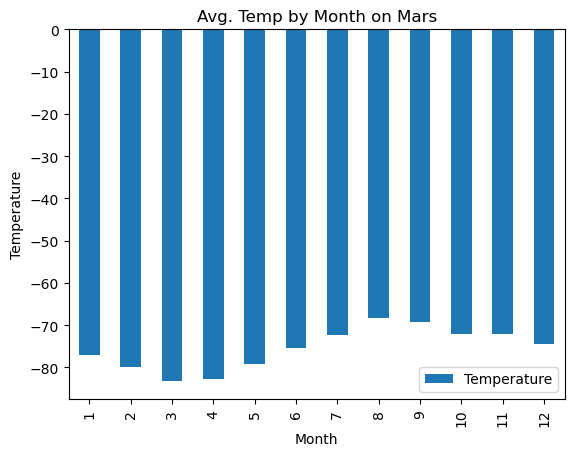

In [16]:
# Plot the average temperature by month

avgt = marsdf.groupby('month')[['min_temp']].mean()

avgt.plot.bar()
plt.title('Avg. Temp by Month on Mars')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(["Temperature"])
plt.show()

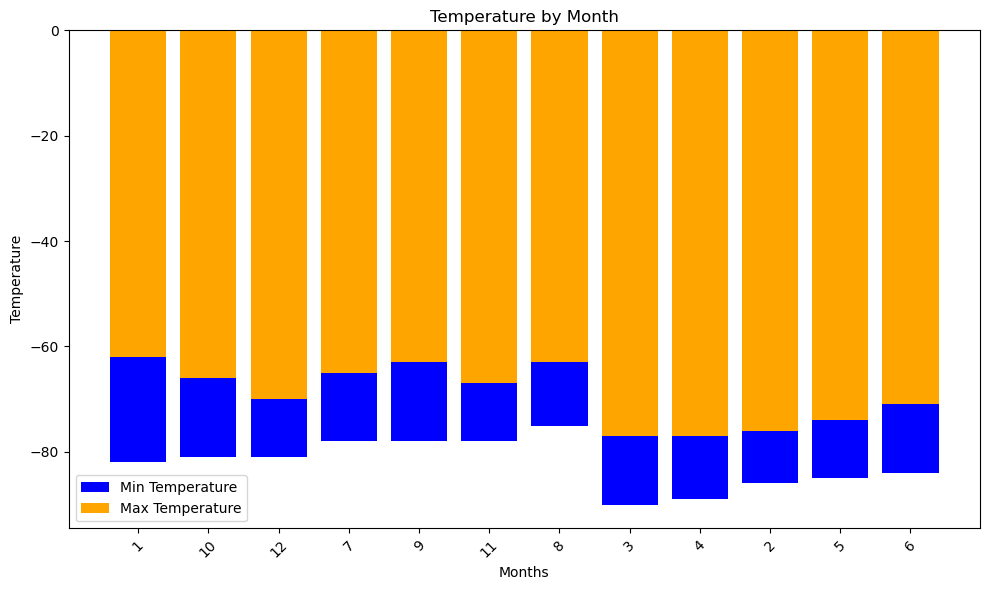

In [17]:
# Identify the coldest and hottest months in Curiosity's location
#FIND
months = marsdf.groupby("month")["min_temp"].agg([min, max])
c_month = months[months['min'] == months['min'].min()].index[0]
h_month = c_month = months[months['max'] == months['max'].max()].index[0]
#SORT
sort_months = months.sort_values(by='min').index.tolist()
c_index = sort_months.index(c_month)
h_index = sort_months.index(h_month)
# Reorder 
ordered_months = sort_months[h_index:] + sort_months[:h_index]
# Extract the corresponding values
ordered_min_temps = months.loc[ordered_months, 'min']
ordered_max_temps = months.loc[ordered_months, 'max']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(ordered_months)), ordered_min_temps, color='blue', label='Min Temperature')
plt.bar(range(len(ordered_months)), ordered_max_temps, color='orange', label='Max Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Temperature by Month')
plt.legend()
plt.xticks(range(len(ordered_months)), ordered_months, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
#Month 3 is the coldest month, Month 1 is the hottest

In [19]:
# 4. Average pressure by Martian month
avgp = marsdf.groupby(['month']).mean()['pressure']
avgp

C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_15636\3416087293.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgp = marsdf.groupby(['month']).mean()['pressure']


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

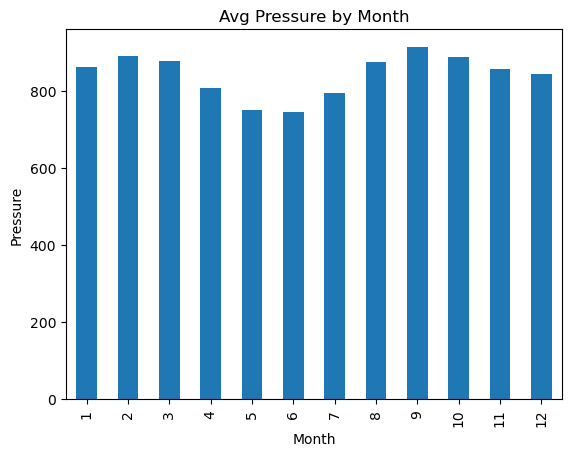

In [20]:
# Plot the average pressure by month
avgp.plot.bar()
plt.title('Avg Pressure by Month')
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

<Axes: xlabel='Number of terrestrial days', ylabel='Minimum Temperature'>

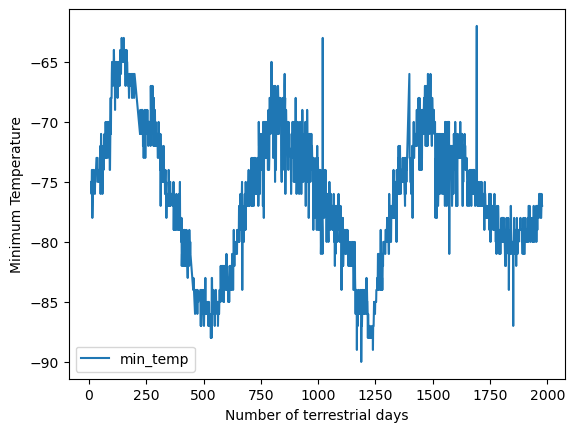

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sortsol = marsdf.sort_values('sol')

sortsol.plot(x='sol', y='min_temp', xlabel = 'Number of terrestrial days', ylabel = "Minimum Temperature")

##ANALYSIS##

## The chart shows a span of earth days vs. Minimum Temperatures on Mars.
## The pattern of the data shows a full Mars orbit 3x: so 3 Martian Years in the dataset. 
## The internet says there are 687 earth days in one martian year 687/365 = roughly 1.88 earth years. 365x1.88 = 
## roughly 686.2 (rounded up I guess)
## Given that number when looking at the data pattern I can eyeball-estimate that one year in this data looks more like one martian 
## year is 625(leaning more on this one) to 675 days, which makes me question the validity of the dataset yet, these figures of comparison change all the
## time with improved telescopics so no harm done? Close enough? I guess that really depend on who the data mattered to.
## 12 months on mars 625/12 = roughly 52 days a month. Looking at the graph and using some mental math, 250 days is roughly 5 months.
## Answers to the remaining questions we needed points are already supplied to us below and with my train of thought, these answers are roughly supported.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
csv_file_path = "mars_temperature_data.csv"
marsdf.to_csv(csv_file_path, index=False)

In [27]:
browser.quit()